<a href="https://colab.research.google.com/github/javohir-ergashboyev/tensorflow_basics/blob/main/Image_Loading.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import numpy as np
import PIL
import PIL.Image
import tensorflow as tf
import tensorflow_datasets as tfds

In [ ]:
import pathlib
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
archive = tf.keras.utils.get_file(origin=dataset_url, extract=True)
data_dir = pathlib.Path(archive).with_suffix('')

In [ ]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


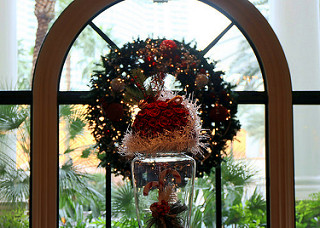

In [ ]:
roses=list(data_dir.glob('roses/*'))
PIL.Image.open(str(roses[0]))

In [ ]:
batch_size=32
IMG_H=180
IMG_W=180

In [ ]:
train_ds=tf.keras.utils.image_dataset_from_directory(
    data_dir,
    batch_size=batch_size,
    validation_split=0.2,
    image_size=(IMG_W,IMG_H),
    subset='training',
    seed=123
)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [ ]:
validate_ds=tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset='validation',
    seed=123,
    batch_size=batch_size,
    image_size=(IMG_W, IMG_H)
)

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [ ]:
class_names=train_ds.class_names
class_names

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']

Visualization

In [ ]:
2936//32

91

In [ ]:
len(train_ds)

92

In [ ]:
import matplotlib.pyplot as plt


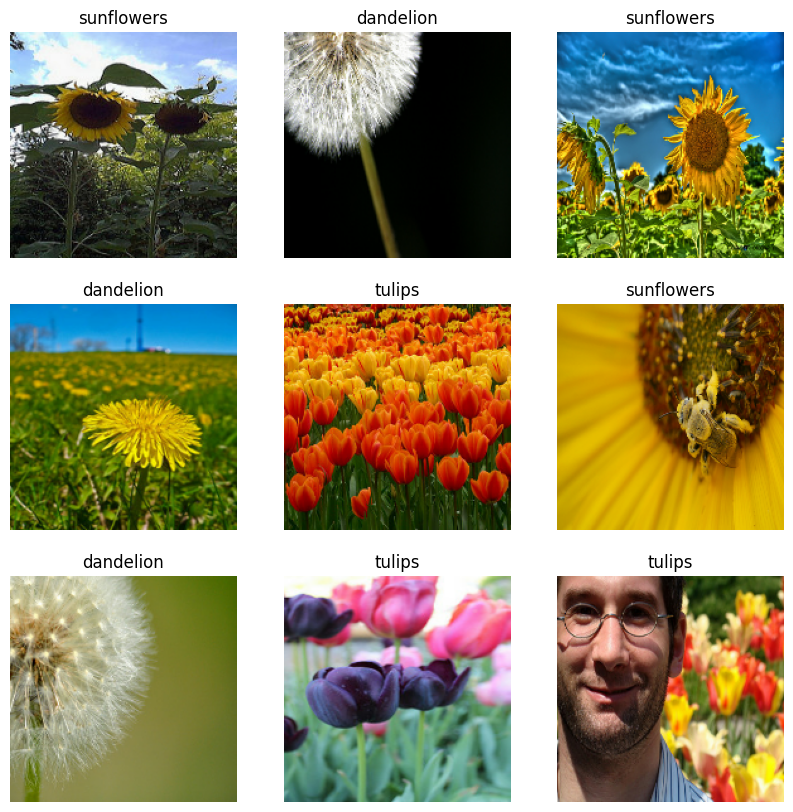

In [ ]:
plt.figure(figsize=(10,10))

for img, label in train_ds.take(1):
    for i in range(9):
      ax=plt.subplot(3,3,i+1)
      plt.imshow(img[i].numpy().astype('uint8'))
      plt.title(class_names[label[i]])
      plt.axis("off")

In [ ]:
for image_batch, label_batch in train_ds:
  print(image_batch.shape)
  print(label_batch.shape)
  break

(32, 180, 180, 3)
(32,)


In [ ]:
normalization_layer=tf.keras.layers.Rescaling(1/255.0)

First way to use normalization layer

In [ ]:
normalized_ds=train_ds.map(lambda x, y: (normalization_layer(x),y))
image_batch,label_batch=next(iter(normalized_ds))
first=image_batch[0]
np.min(first), np.max(first), np.mean(first)

(0.0, 0.9990197, 0.18011571)

In [ ]:
AUTOTUNE=tf.data.AUTOTUNE
train_ds=train_ds.cache().prefetch(buffer_size=AUTOTUNE)
validate_ds=validate_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
model=tf.keras.Sequential([
   tf.keras.layers.Rescaling(1/255.0),
   tf.keras.layers.Conv2D(32,3, activation='relu'),
   tf.keras.layers.MaxPooling2D(),
   tf.keras.layers.Conv2D(32,3, activation='relu'),
   tf.keras.layers.MaxPooling2D(),
   tf.keras.layers.Conv2D(32,3, activation='relu'),
   tf.keras.layers.MaxPooling2D(),
   tf.keras.layers.Flatten(),
   tf.keras.layers.Dense(128, activation='relu'),
   tf.keras.layers.Dense(5)
])

In [ ]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [ ]:
model.fit(
    train_ds,
    epochs=7,
    validation_data=validate_ds
)

Epoch 1/7
92/92 [==============================] - 2s 25ms/step - loss: 0.4339 - accuracy: 0.8430 - val_loss: 1.3059 - val_accuracy: 0.5777
Epoch 2/7
92/92 [==============================] - 2s 26ms/step - loss: 0.3749 - accuracy: 0.8672 - val_loss: 1.3270 - val_accuracy: 0.6172
Epoch 3/7
92/92 [==============================] - 2s 24ms/step - loss: 0.2922 - accuracy: 0.8937 - val_loss: 1.3161 - val_accuracy: 0.6213
Epoch 4/7
92/92 [==============================] - 2s 24ms/step - loss: 0.2706 - accuracy: 0.9080 - val_loss: 1.4831 - val_accuracy: 0.5926
Epoch 5/7
92/92 [==============================] - 2s 24ms/step - loss: 0.2617 - accuracy: 0.9145 - val_loss: 1.3059 - val_accuracy: 0.6335
Epoch 6/7
92/92 [==============================] - 2s 24ms/step - loss: 0.1884 - accuracy: 0.9373 - val_loss: 1.5042 - val_accuracy: 0.6035
Epoch 7/7
92/92 [==============================] - 2s 25ms/step - loss: 0.1390 - accuracy: 0.9584 - val_loss: 1.7809 - val_accuracy: 0.6172


1/1 [==============================] - 0s 27ms/step


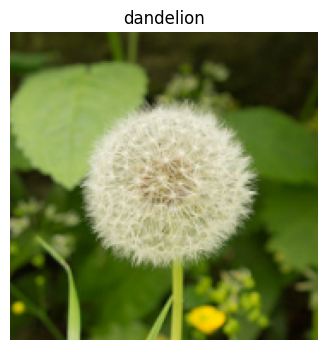

In [ ]:
plt.figure(figsize=(5,4))
for img, label in train_ds.take(1):
    pred=model.predict(np.expand_dims(img[2], axis=0))
    plt.title(class_names[np.argmax(pred)])
    plt.imshow(img[2].numpy().astype('uint8'))
    plt.axis('off')
    break

In [ ]:
list_ds=tf.data.Dataset.list_files(str(data_dir/'*/*'), shuffle=False)
list_ds=list_ds.shuffle(3736, reshuffle_each_iteration=False)

In [ ]:
for i in list_ds.take(5):
  print(i.numpy())

b'/root/.keras/datasets/flower_photos/sunflowers/15066430311_fb57fa92b0_m.jpg'
b'/root/.keras/datasets/flower_photos/roses/326541992_d542103ca8_n.jpg'
b'/root/.keras/datasets/flower_photos/dandelion/19613204505_da554eb56a_n.jpg'
b'/root/.keras/datasets/flower_photos/sunflowers/9240005603_6a9b71dcea_n.jpg'
b'/root/.keras/datasets/flower_photos/daisy/14245834619_153624f836.jpg'


In [ ]:
class_names=np.array(sorted([item.name for item in data_dir.glob('*') if item.name!='LICENSE.txt']))
class_names

array(['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips'],
      dtype='<U10')

In [ ]:
image_count=3670
val_size=int(image_count*0.2)
val_ds=list_ds.take(val_size)
train_ds=list_ds.skip(val_size)

In [ ]:
print(tf.data.experimental.cardinality(train_ds).numpy())
print(tf.data.experimental.cardinality(val_ds).numpy())

2936
734
